In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

years = range(2010, 2020)
years_reverse = range(2017, 2020)
headers = {"User-Agent": "Mozilla/5.0"}

all_data = []

for year in years:
    url = f"https://billboardtop100of.com/{year}-2/"
    print(f"Scraping {year}...")
    html = requests.get(url, headers=headers).text
    soup = BeautifulSoup(html, "html.parser")

    table = soup.find("table")
    if not table:
        print(f"No table found for {year}")
        continue

    for row in table.find_all("tr"):
        cols = row.find_all("td")

        if len(cols) == 3:
          if year not in years_reverse: #Special case when columns are switched on the website
            rank = cols[0].text.strip()
            song = cols[2].text.strip('“” \n\t')
            artist = cols[1].text.strip()
          else:
            rank = cols[0].text.strip()
            song = cols[1].text.strip('“” \n\t')
            artist = cols[2].text.strip()
          all_data.append({
              "Billboard year": year,
              "rank": int(rank),
              "song": song,
              "artist": artist
          })
    time.sleep(1)

df_top100 = pd.DataFrame(all_data)
print(df_top100.head())
print(f"\nTotal records scraped: {len(df_top100)}")


Scraping 2010...
Scraping 2011...
Scraping 2012...
Scraping 2013...
No table found for 2013
Scraping 2014...
Scraping 2015...
Scraping 2016...
Scraping 2017...
Scraping 2018...
Scraping 2019...
   Billboard year  rank              song                       artist
0            2010     1           TiK ToK                        Ke$ha
1            2010     2      Need You Now              Lady Antebellum
2            2010     3  Hey, Soul Sister                        Train
3            2010     4  California Gurls  Katy Perry feat. Snoop Dogg
4            2010     5               OMG        Usher feat. will.i.am

Total records scraped: 900


In [32]:
df_top100.to_csv("top100_data.csv", index=False)
df_top100

,Billboard year,rank,song,artist
0,2010,1,TiK ToK,Ke$ha
1,2010,2,Need You Now,Lady Antebellum
2,2010,3,"Hey, Soul Sister",Train
3,2010,4,California Gurls,Katy Perry feat. Snoop Dogg
4,2010,5,OMG,Usher feat. will.i.am
...,...,...,...,...
895,2019,96,Eyes on You,Chase Rice
896,2019,97,All to Myself,Dan + Shay
897,2019,98,Boyfriend,Ariana Grande and Social House
898,2019,99,Walk Me Home,Pink


In [8]:
token = "BQAUxre3FL6WIbam75FsWEeR3XK9BaPTFeAv4_BE7bgnmyqznjfa1_qKj8kGAKIJK19APnmn6S50t6qWMFyveOZs7VglWHninUeU8_3IVeqGX0_61yNDbMthjVqH40QuBbO2crcmexA"
headers = {"Authorization": f"Bearer {token}"}

spotify_data = []

for i, row in df_top100.iterrows():
    query = f"{row['song']} {row['artist']}"
    params = {"q": query, "type": "track", "limit": 1}

    res = requests.get("https://api.spotify.com/v1/search", headers=headers, params=params)
    data = res.json()

    if data.get('tracks', {}).get('items'):
        track = data['tracks']['items'][0]
        track_id = track['id']
        popularity = track['popularity']
        track_url = track['external_urls']['spotify']

        spotify_data.append({
            "song": row['song'],
            "artist": row['artist'],
            "spotify_id": track_id,
            "spotify_popularity": popularity,
        })
    else:
        spotify_data.append({
            "song": row['song'],
            "artist": row['artist'],
            "spotify_id": None,
            "spotify_popularity": None,
        })

    time.sleep(0.2)

df_spotify = pd.DataFrame(spotify_data)
print(df_spotify.head(10))


                   song                       artist              spotify_id  \
0               TiK ToK                        Ke$ha  0HPD5WQqrq7wPWR7P7Dw1i   
1          Need You Now              Lady Antebellum  11EX5yhxr9Ihl3IN1asrfK   
2      Hey, Soul Sister                        Train  4HlFJV71xXKIGcU3kRyttv   
3      California Gurls  Katy Perry feat. Snoop Dogg  3glgou0Tu1wEYeo5Lt87In   
4                   OMG        Usher feat. will.i.am  1bM50INir8voAkVoKuvEUI   
5             Airplanes  B.o.B feat. Hayley Williams  6lV2MSQmRIkycDScNtrBXO   
6  Love The Way You Lie         Eminem feat. Rihanna  15JINEqzVMv3SvJTAXAKED   
7           Bad Romance                    Lady Gaga  7kUOJYN2ynGfTYNlgNLpgY   
8              Dynamite                    Taio Cruz  1DqdF42leyFIzqNDv9CjId   
9      Break Your Heart     Taio Cruz feat. Ludacris  1CdqVF1ywD0ZO1zXtB9yWa   

   spotify_popularity  
0                84.0  
1                74.0  
2                82.0  
3                26.0  

In [31]:
df_spotify.to_csv("spotify_data.csv", index=False)
df_spotify

,song,artist,spotify_id,spotify_popularity
0,TiK ToK,Ke$ha,0HPD5WQqrq7wPWR7P7Dw1i,84.0
1,Need You Now,Lady Antebellum,11EX5yhxr9Ihl3IN1asrfK,74.0
2,"Hey, Soul Sister",Train,4HlFJV71xXKIGcU3kRyttv,82.0
3,California Gurls,Katy Perry feat. Snoop Dogg,3glgou0Tu1wEYeo5Lt87In,26.0
4,OMG,Usher feat. will.i.am,1bM50INir8voAkVoKuvEUI,77.0
...,...,...,...,...
895,Eyes on You,Chase Rice,4w95iGC6NrxZJ5o3D7bWyV,63.0
896,All to Myself,Dan + Shay,08tq1XcHwVt5PHXUo87i0D,60.0
897,Boyfriend,Ariana Grande and Social House,2Glf6h5zsGRg3xmhj2Jw1K,4.0
898,Walk Me Home,Pink,7DHApOHsIFo7EyfieArYGE,59.0


In [10]:
all_features = []

batch_size = 40
spotify_ids = df_spotify['spotify_id'].dropna().tolist()

url = f"https://api.reccobeats.com/v1/track"

for i in range(0, len(spotify_ids), batch_size):
    batch = spotify_ids[i:i+batch_size]
    ids_str = ",".join(batch)
    params = {"ids": ids_str}

    response = requests.get(url, params=params)
    if response.status_code != 200:
        print(f"Failed batch starting at index {i}")
        continue

    tracks = response.json().get("content", [])

    for t in tracks:
        recco_id = t["id"]

        audio_url = f"https://api.reccobeats.com/v1/track/{recco_id}/audio-features"
        audio_res = requests.get(audio_url)

        if audio_res.status_code == 200:
            audio_data = audio_res.json()
        else:
            audio_data = {}

        all_features.append({
            "spotify_id": t["href"].split("/")[-1],
            "danceability": audio_data.get("danceability"),
            "energy": audio_data.get("energy"),
            "valence": audio_data.get("valence"),
            "tempo": audio_data.get("tempo"),
            "acousticness": audio_data.get("acousticness"),
            "speechiness": audio_data.get("speechiness"),
        })

        time.sleep(0.2)

df_recco = pd.DataFrame(all_features)
print(df_recco.head())


               spotify_id  danceability  energy  valence    tempo  \
0  0HPD5WQqrq7wPWR7P7Dw1i         0.755   0.837    0.714  120.028   
1  7HacCTm33hZYYN8DXpCYuG         0.648   0.942    0.730  129.007   
2  4fIWvT19w9PR0VVBuPYpWA         0.615   0.733    0.796  122.580   
3  7BqBn9nzAq8spo5e7cZ0dJ         0.635   0.841    0.424  109.021   
4  6qPmHkh9eXxsC3NFZLAgY6         0.836   0.549    0.541  132.028   

   acousticness  speechiness  
0        0.0991       0.1420  
1        0.0210       0.0878  
2        0.1520       0.0335  
3        0.0134       0.0422  
4        0.0030       0.0768  


In [33]:
df_recco.to_csv("recco_data.csv", index=False)
df_recco

,spotify_id,danceability,energy,valence,tempo,acousticness,speechiness
0,0HPD5WQqrq7wPWR7P7Dw1i,0.755,0.837,0.714,120.028,0.09910,0.1420
1,7HacCTm33hZYYN8DXpCYuG,0.648,0.942,0.730,129.007,0.02100,0.0878
2,4fIWvT19w9PR0VVBuPYpWA,0.615,0.733,0.796,122.580,0.15200,0.0335
3,7BqBn9nzAq8spo5e7cZ0dJ,0.635,0.841,0.424,109.021,0.01340,0.0422
4,6qPmHkh9eXxsC3NFZLAgY6,0.836,0.549,0.541,132.028,0.00300,0.0768
...,...,...,...,...,...,...,...
685,4qQwGRtGT7l6ckQtdPEFd4,0.651,0.708,0.558,119.964,0.58200,0.0376
686,5N1o6d8zGcSZSeMFkOUQOk,0.872,0.814,0.570,98.985,0.00485,0.1550
687,7DHApOHsIFo7EyfieArYGE,0.652,0.453,0.432,88.039,0.05070,0.0445
688,0VB3YI0Dl6TT3C7mIbHTs4,0.891,0.431,0.447,120.137,0.07870,0.5490


In [13]:
df_final = pd.merge(df_top100, df_spotify, on=["song", "artist"], how="left")
df_final = pd.merge(df_final, df_recco, on="spotify_id", how="left")

df_final = df_final.drop_duplicates(subset=["rank", "Billboard year"], keep="first")

df_final

,Billboard year,rank,song,artist,spotify_id,spotify_popularity,danceability,energy,valence,tempo,acousticness,speechiness
0,2010,1,TiK ToK,Ke$ha,0HPD5WQqrq7wPWR7P7Dw1i,84.0,0.755,0.837,0.714,120.028,0.0991,0.1420
1,2010,2,Need You Now,Lady Antebellum,11EX5yhxr9Ihl3IN1asrfK,74.0,0.588,0.622,0.229,107.942,0.0906,0.0303
2,2010,3,"Hey, Soul Sister",Train,4HlFJV71xXKIGcU3kRyttv,82.0,0.673,0.886,0.795,97.012,0.1850,0.0431
3,2010,4,California Gurls,Katy Perry feat. Snoop Dogg,3glgou0Tu1wEYeo5Lt87In,26.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,5,OMG,Usher feat. will.i.am,1bM50INir8voAkVoKuvEUI,77.0,0.781,0.745,0.326,129.998,0.1980,0.0332
...,...,...,...,...,...,...,...,...,...,...,...,...
1235,2019,96,Eyes on You,Chase Rice,4w95iGC6NrxZJ5o3D7bWyV,63.0,0.340,0.652,0.464,88.783,0.3230,0.0427
1236,2019,97,All to Myself,Dan + Shay,08tq1XcHwVt5PHXUo87i0D,60.0,0.646,0.781,0.565,94.975,0.2080,0.0313
1237,2019,98,Boyfriend,Ariana Grande and Social House,2Glf6h5zsGRg3xmhj2Jw1K,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1238,2019,99,Walk Me Home,Pink,7DHApOHsIFo7EyfieArYGE,59.0,0.652,0.453,0.432,88.039,0.0507,0.0445


In [34]:
df_final.to_csv("final_data.csv", index=False)

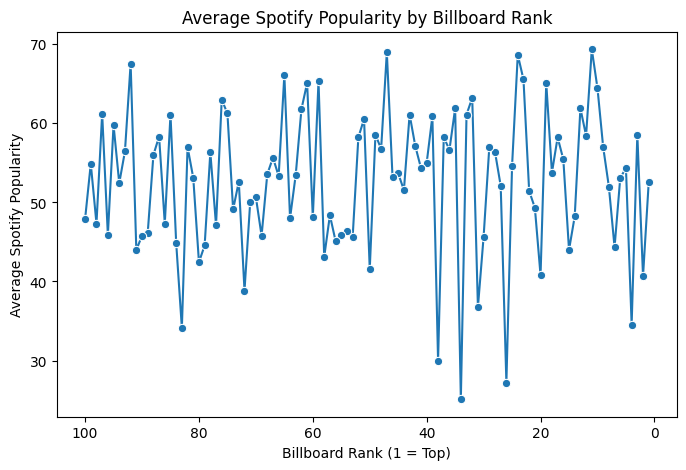

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_popularity = df_final.groupby("rank")["spotify_popularity"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=avg_popularity, x="rank", y="spotify_popularity", marker="o")
plt.gca().invert_xaxis()
plt.title("Average Spotify Popularity by Billboard Rank")
plt.xlabel("Billboard Rank (1 = Top)")
plt.ylabel("Average Spotify Popularity")
plt.show()


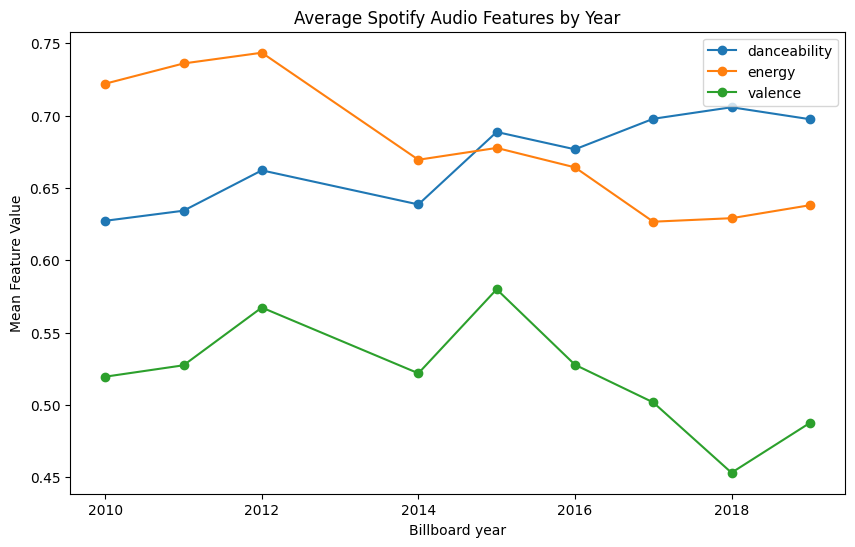

In [28]:
df_new = df_final.dropna(subset=["danceability", "energy", "valence"])

features_by_year = df_new.groupby("Billboard year")[["danceability", "energy", "valence"]].mean()
features_by_year.plot(kind="line", marker="o", figsize=(10,6))
plt.title("Average Spotify Audio Features by Year")
plt.ylabel("Mean Feature Value")
plt.show()


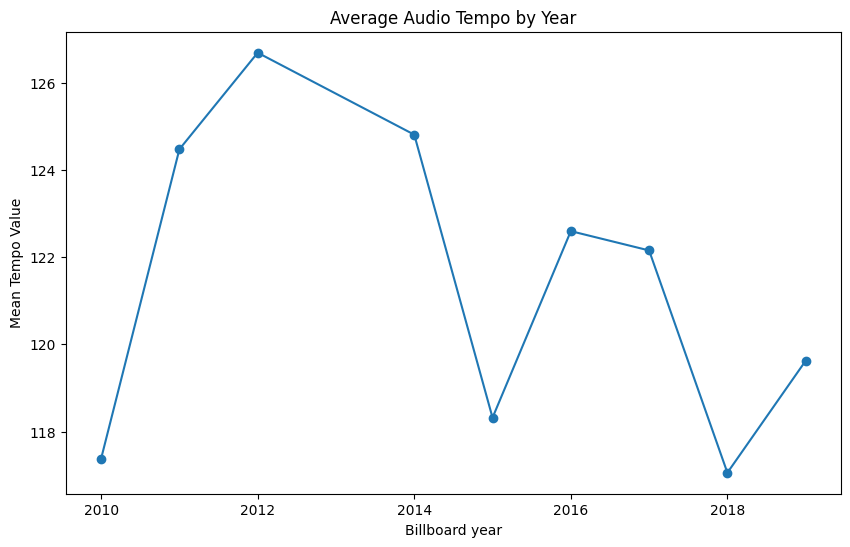

In [29]:
df_new = df_final.dropna(subset=["tempo"])

features_by_year = df_new.groupby("Billboard year")["tempo"].mean()
features_by_year.plot(kind="line", marker="o", figsize=(10,6))
plt.title("Average Audio Tempo by Year")
plt.ylabel("Mean Tempo Value")
plt.show()


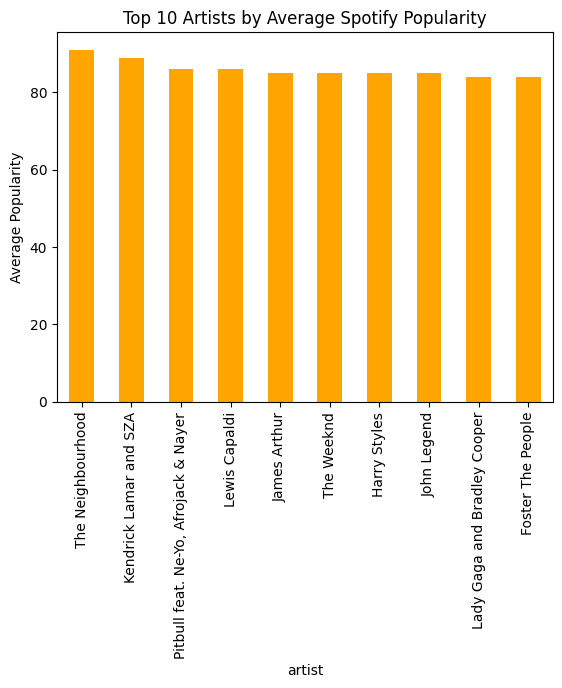

In [17]:
top_artists = df_final.groupby("artist")["spotify_popularity"].mean().sort_values(ascending=False).head(10)
top_artists.plot(kind="bar", color="orange")
plt.title("Top 10 Artists by Average Spotify Popularity")
plt.ylabel("Average Popularity")
plt.show()


/tmp/ipython-input-2386667165.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=artist_counts, x="count", y="artist", palette="viridis")


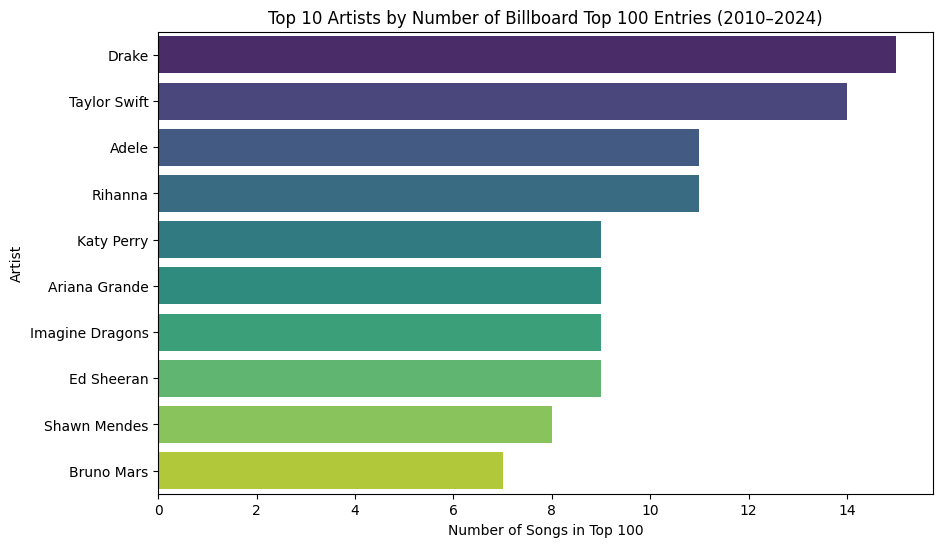

In [22]:
#Top artists based on how frequently they are in top 100

artist_counts = (
    df_final["artist"]
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={"index": "artist", "artist": "count"})
)

artist_counts.columns = ["artist", "count"]

plt.figure(figsize=(10,6))
sns.barplot(data=artist_counts, x="count", y="artist", palette="viridis")
plt.title("Top 10 Artists by Number of Billboard Top 100 Entries (2010–2024)")
plt.xlabel("Number of Songs in Top 100")
plt.ylabel("Artist")
plt.show()



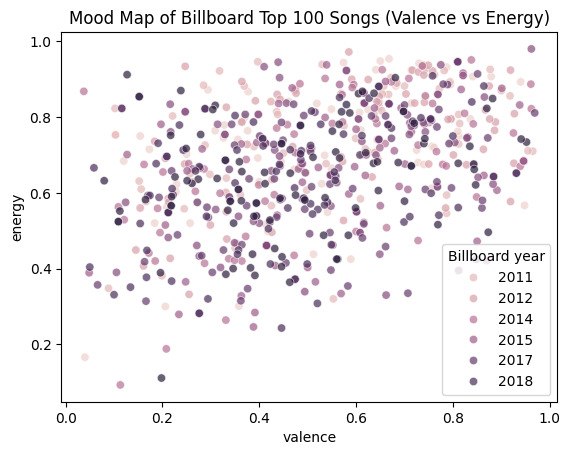

In [30]:
sns.scatterplot(data=df_final, x="valence", y="energy", hue="Billboard year", alpha=0.7)
plt.title("Mood Map of Billboard Top 100 Songs (Valence vs Energy)")
plt.show()

In [40]:

#key stats
mean_pop = df_final["spotify_popularity"].mean()
min_pop = df_final["spotify_popularity"].min()
max_pop = df_final["spotify_popularity"].max()

top10_popular = df_final.nlargest(10, "spotify_popularity")[["song", "artist", "spotify_popularity"]]

mean_dance = df_final["danceability"].mean()
mean_energy = df_final["energy"].mean()
corr_energy_tempo = df_final["energy"].corr(df_final["tempo"])

min_tempo = df_final["tempo"].min()
max_tempo = df_final["tempo"].max()
median_tempo = df_final["tempo"].median()

#Billboard Rank vs Spotify Popularity
corr_rank_pop = df_final["rank"].corr(df_final["spotify_popularity"])

corr_energy_valence = df_final["energy"].corr(df_final["valence"])
corr_dance_valence = df_final["danceability"].corr(df_final["valence"])
corr_energy_acoustic = df_final["energy"].corr(df_final["acousticness"])


print(f"Spotify Popularity:\n  Mean = {mean_pop:.1f}, Min = {min_pop}, Max = {max_pop}")
print(f"  Top 10 songs (by Spotify popularity):")
print(top10_popular.to_string(index=False))
print()

print(f"Danceability & Energy:\n  Mean Danceability = {mean_dance:.2f}, Mean Energy = {mean_energy:.2f}")
print(f"  Correlation (Energy vs Tempo): {corr_energy_tempo:.2f}")
print(f"  Correlation (Energy vs Valence): {corr_energy_valence:.2f}")
print(f"  Correlation (Danceability vs Valence): {corr_dance_valence:.2f}")
print(f"  Correlation (Energy vs Acousticness): {corr_energy_acoustic:.2f}")
print()

print(f"Tempo (BPM):\n  Range = {min_tempo:.0f}–{max_tempo:.0f}, Median = {median_tempo:.0f}")
print()

print(f"Billboard Rank vs Spotify Popularity:\n  Correlation = {corr_rank_pop:.2f} "
      f"({'negative' if corr_rank_pop < 0 else 'positive'} relationship)")


Spotify Popularity:
  Mean = 52.7, Min = 0.0, Max = 91.0
  Top 10 songs (by Spotify popularity):
                           song                                artist  spotify_popularity
                Sweater Weather                     The Neighbourhood                91.0
Adventure Of A Lifetime\nLYRICS                              Coldplay                91.0
                  All the Stars                Kendrick Lamar and SZA                89.0
                   Shape of You                            Ed Sheeran                88.0
                        Perfect                            Ed Sheeran                88.0
                   Shape of You                            Ed Sheeran                88.0
             That’s What I Like                            Bruno Mars                87.0
                      Attention                          Charlie Puth                87.0
             Give Me Everything Pitbull feat. Ne-Yo, Afrojack & Nayer                86.0
   